# Project: Investigate the TMDB Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [106]:
# import all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [120]:
# load the data

df = pd.read_csv('tmdb-movies.csv')

In [122]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


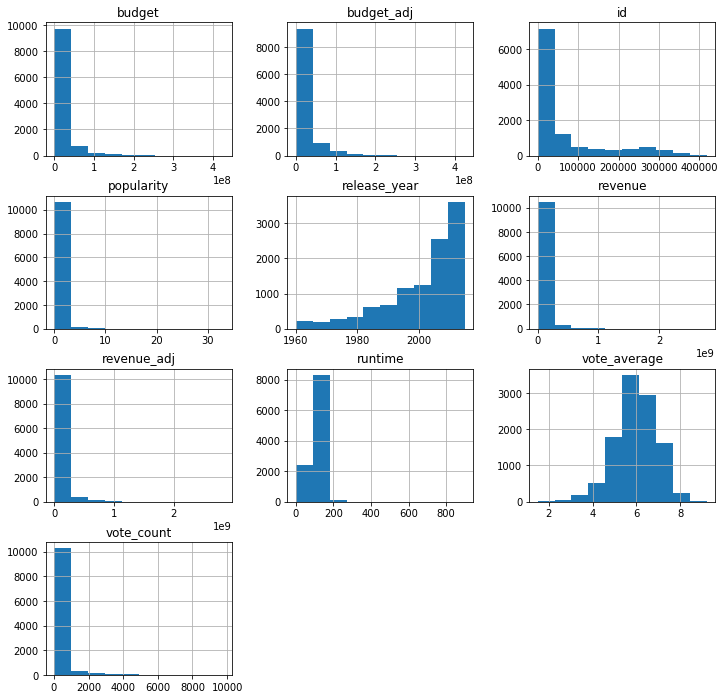

In [123]:
# check the histogram for all columns to get an overview of the entire dataframe

df.hist(figsize=(12,12));

In [124]:
# Get an overview of the columns missing the values and also check the shape of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [125]:
# Drop columns which are not used for further analysis

df.drop(['id','imdb_id','homepage','tagline','keywords','overview','cast'],axis=1,inplace=True)

In [126]:
# check for duplicates

df[df.duplicated()]

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,0.59643,30000000,967000,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [127]:
# drop duplicates

df.drop_duplicates(inplace=True)

In [128]:
# Check the data again

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


In [129]:
# divide the revenue, budget columns by 1000000
# its easier to read million dollar values

df.revenue = df.revenue/1000000
df.budget = df.budget/1000000
df.revenue_adj = df.revenue_adj/1000000
df.budget_adj = df.budget_adj/1000000

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1. Top 5 Movies with the Highest Budget

In [130]:
# show first 2 rows of the dataframe

df.head(5)

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150.0,1513.528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137.999939,1392.445893
1,28.419936,150.0,378.436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137.999939,348.161292
2,13.112507,110.0,295.238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101.199955,271.619025
3,11.173104,200.0,2068.178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183.999919,1902.723130
4,9.335014,190.0,1506.249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174.799923,1385.748801


In [132]:
# sort the dataframe in the descending order of budget
# read out first 5 rows and store it in top_5b variable

top_5b = df.sort_values(['budget_adj'],ascending=False).head(5)
top_5b

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,0.250540,425.0,11.087569,The Warrior's Way,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,12/2/10,74,6.4,2010,425.000000,11.087569
3375,4.955130,380.0,1021.683000,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,5/11/11,3180,6.3,2011,368.371256,990.417500
7387,4.965391,300.0,961.000000,Pirates of the Caribbean: At World's End,Gore Verbinski,169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,5/19/07,2626,6.8,2007,315.500575,1010.653508
6570,1.957331,270.0,391.081192,Superman Returns,Bryan Singer,154,Adventure|Fantasy|Action|Science Fiction,DC Comics|Legendary Pictures|Warner Bros.|Bad ...,6/28/06,834,5.3,2006,292.050673,423.020464
5231,4.355219,200.0,1845.034188,Titanic,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,271.692064,2506.405735


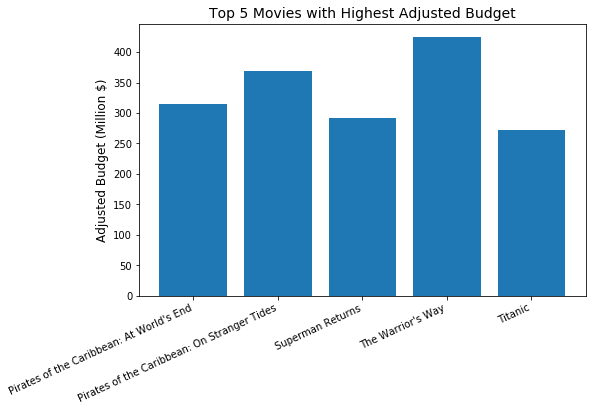

In [133]:
# plotting

plt.subplots(figsize=(8,5))

plt.bar(top_5b.original_title, top_5b.budget_adj)
plt.ylabel('Adjusted Budget (Million $)', fontsize=12)
plt.title('Top 5 Movies with Highest Adjusted Budget',fontsize=14)
plt.xticks(rotation=25, ha="right");

### Research Question 2: Top 5 Movies with Highest Profits

In [134]:
# show first 2 rows of df

df.head(2)

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150.0,1513.528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137.999939,1392.445893
1,28.419936,150.0,378.436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137.999939,348.161292


In [138]:
# extract the non zero budget adj and revenue adj rows

df_nzrb = df[(df.budget_adj!=0) & (df.revenue_adj!=0)]
df_nzrb.head(2)

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150.0,1513.528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137.999939,1392.445893
1,28.419936,150.0,378.436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137.999939,348.161292


In [136]:
# calculate profits earned by revenue adj - budget adj

profits = pd.DataFrame(df_nzrb.revenue_adj - df_nzrb.budget_adj)

# rename the columns in profits dataframe

profits.columns = ['profits']

In [139]:
# concatanate the profits columns to the non zero revenue budget dataframe --> df_nzrb

df_nzrb = pd.concat([df_nzrb, profits],axis=1)
df_nzrb

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits
0,32.985763,150.000000,1513.528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137.999939,1392.445893,1254.445953
1,28.419936,150.000000,378.436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137.999939,348.161292,210.161353
2,13.112507,110.000000,295.238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101.199955,271.619025,170.419070
3,11.173104,200.000000,2068.178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183.999919,1902.723130,1718.723211
4,9.335014,190.000000,1506.249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174.799923,1385.748801,1210.948878
5,9.110700,135.000000,532.950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,124.199945,490.314247,366.114302
6,8.654359,155.000000,440.603537,Terminator Genisys,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,142.599937,405.355076,262.755138
7,7.667400,108.000000,595.380321,The Martian,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,99.359956,547.749654,448.389698
8,7.404165,74.000000,1156.730962,Minions,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,68.079970,1064.192017,996.112047
9,6.326804,175.000000,853.708609,Inside Out,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,160.999929,785.411575,624.411646


In [140]:
# sort the dataframe in the descending order of profits
# store the first 5 rows in top_5p

top_5p = df_nzrb.sort_values(['profits'], ascending=False).head(5)
top_5p

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profits
1329,12.037933,11.0,775.398007,Star Wars,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,3/20/77,4428,7.9,1977,39.575591,2789.712242,2750.136651
1386,9.432768,237.0,2781.505847,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,12/10/09,8458,7.1,2009,240.886903,2827.123750,2586.236848
5231,4.355219,200.0,1845.034188,Titanic,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,11/18/97,4654,7.3,1997,271.692064,2506.405735,2234.713671
10594,2.010733,8.0,441.306145,The Exorcist,William Friedkin,122,Drama|Horror|Thriller,Warner Bros.|Hoya Productions,12/26/73,1113,7.2,1973,39.289277,2167.324901,2128.035625
9806,2.563191,7.0,470.654000,Jaws,Steven Spielberg,124,Horror|Thriller|Adventure,Universal Pictures|Zanuck/Brown Productions,6/18/75,1415,7.3,1975,28.362748,1907.005842,1878.643094


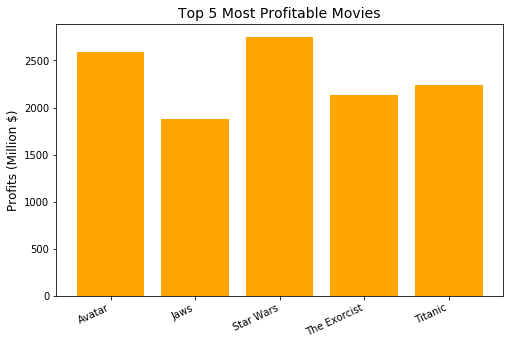

In [141]:
# plotting

plt.subplots(figsize=(8,5))

plt.bar(top_5p.original_title, top_5p.profits,color='orange')
plt.ylabel('Profits (Million $)', fontsize=12)
plt.title('Top 5 Most Profitable Movies',fontsize=14)
plt.xticks(rotation=25, ha="right");

#### Result (from first 2 graphs): Most profitable movies do not always have the highest budgets. However this analysis was done by considering non zero budget and revenue adj columns. Hence, the result is only valid for the data which is available.

### Research Question 3. Most popular Genre Year on Year

In [96]:
df.head(5)

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,0.00015,0.001514,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137.999939,1392.445893
1,28.419936,0.00015,0.000378,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137.999939,348.161292
2,13.112507,0.00011,0.000295,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101.199955,271.619025
3,11.173104,0.00020,0.002068,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183.999919,1902.723130
4,9.335014,0.00019,0.001506,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174.799923,1385.748801


In [85]:
# split the values in the genre column into different individual columns

genre = df.genres.str.split('|',expand=True)

In [142]:
# confirm the operation

genre.head(2)

,genre_1,genre_2,genre_3,genre_4,genre_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None


In [143]:
# rename the columns in the genre dataframe 

genre.columns = ['genre_1','genre_2','genre_3','genre_4','genre_5']
genre.head(2)

,genre_1,genre_2,genre_3,genre_4,genre_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None


In [144]:
# concatanate the genre dataframe with original dataframe (df)

df1 = pd.concat([df,genre],axis=1)
df1.head(2)

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5
0,32.985763,150.0,1513.528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137.999939,1392.445893,Action,Adventure,Science Fiction,Thriller,None
1,28.419936,150.0,378.436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137.999939,348.161292,Action,Adventure,Science Fiction,Thriller,None


In [145]:
# extract the relevant columns for further analysis
# here only the first value in genre is considered for all rows and further analysis is carried on 

df2 = df1[['popularity','release_year','genre_1']]
df2.head(2)

,popularity,release_year,genre_1
0,32.985763,2015,Action
1,28.419936,2015,Action


In [147]:
# group the dataframe by release
# use agg function to find the max. value of popularity and the corresponding genre

df3 = pd.DataFrame(df2.groupby(['release_year']).agg({'popularity':[max],'genre_1':['first']}))
df3.head(2)

,popularity,genre_1
,max,first
release_year,,
1960,2.610362,Drama
1961,2.631987,Adventure


In [148]:
# select the first index in the multilevel indexing

df3.columns = df3.columns.get_level_values(0)

In [149]:
# reset the index of the dataframe 

df3 = df3.reset_index()
df3.head(5)

,release_year,popularity,genre_1
0,1960,2.610362,Drama
1,1961,2.631987,Adventure
2,1962,3.170651,Adventure
3,1963,2.508235,Action
4,1964,3.153791,Adventure


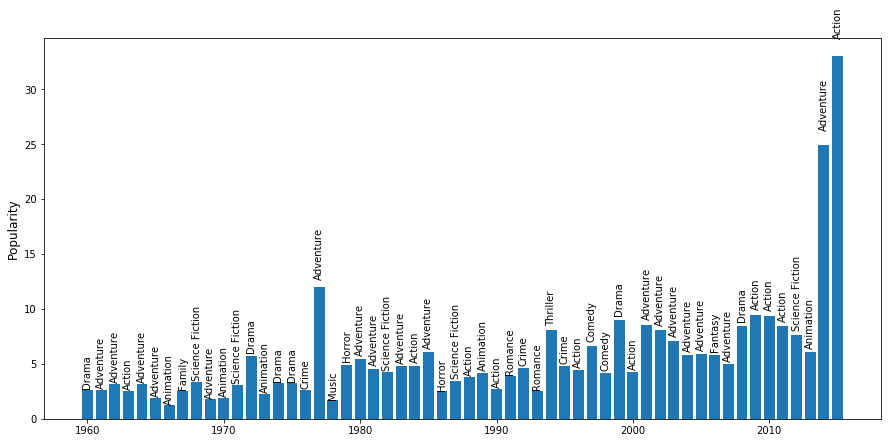

In [150]:
# plotting

fig, ax = plt.subplots(figsize=(15,7))

bar_plot = plt.bar(df3.release_year,df3.popularity)
plt.ylabel('Popularity', fontsize=12)

# adding text/labels on top of the bar graphs

def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
            df3.genre_1[idx],
            ha='center', va='bottom', rotation=90)

autolabel(bar_plot)

#### Result: Graph is difficult to read and further filtering is carried out in next question

### Research Question 4. Most Popular Genres of All Time

In [151]:
df3.head(5)

,release_year,popularity,genre_1
0,1960,2.610362,Drama
1,1961,2.631987,Adventure
2,1962,3.170651,Adventure
3,1963,2.508235,Action
4,1964,3.153791,Adventure


In [152]:
# count the number of times a genre value appears

top_gen = pd.DataFrame(df3.genre_1.value_counts())

In [153]:
# calulate the instances of each genre values and find its portion of total values

popularity_prop = top_gen.genre_1/top_gen.genre_1.sum()

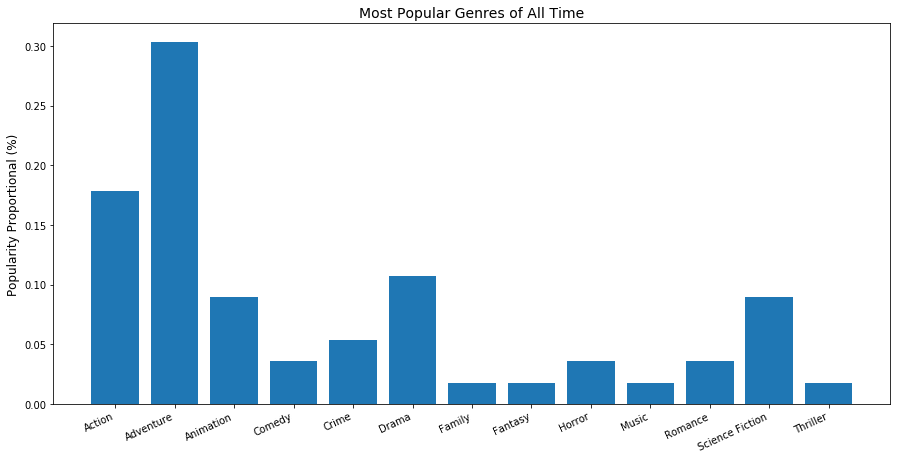

In [154]:
# plotting

fig, ax = plt.subplots(figsize=(15,7))

bar_plot = plt.bar(top_gen.index,popularity_prop)
plt.ylabel('Popularity Proportional (%)', fontsize=12)
plt.title('Most Popular Genres of All Time',fontsize=14);
plt.xticks(rotation=25, ha="right");

#### Result: Action and Aventure appears to be the most popular genre. However, this analysis is carried out by considering only the first value in the genre column.

### Research Question 5. Number of Movies Released in Different Quaters

In [160]:
# extract the months from the release data column and store it has an integer

months = pd.DataFrame(df.release_date.str.split('/',expand=True)).astype(int)

# rename the columns

months.columns = ['m','d','y']
months.head(5)

,m,d,y
0,6,9,15
1,5,13,15
2,3,18,15
3,12,15,15
4,4,1,15


In [162]:
# concatanate the months column to the original dataframe (df)

df4 = pd.concat([df,months.m], axis=1)
df4.head(5)

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,m
0,32.985763,150.0,1513.528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137.999939,1392.445893,6
1,28.419936,150.0,378.436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137.999939,348.161292,5
2,13.112507,110.0,295.238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101.199955,271.619025,3
3,11.173104,200.0,2068.178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183.999919,1902.723130,12
4,9.335014,190.0,1506.249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174.799923,1385.748801,4


In [163]:
# divide the year into different quaters


bin_edges = [1,3,6,9,12]
bin_names = ['Q1','Q2','Q3','Q4']

In [164]:
# create a new column quater which contains the Q1, Q2, Q3, Q4 values corresponding to the different months 

df4["quater"] = pd.cut(df4.m,bin_edges,labels=bin_names).astype(str)
df4.head(5)

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,m,quater
0,32.985763,150.0,1513.528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137.999939,1392.445893,6,Q2
1,28.419936,150.0,378.436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137.999939,348.161292,5,Q2
2,13.112507,110.0,295.238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101.199955,271.619025,3,Q1
3,11.173104,200.0,2068.178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183.999919,1902.723130,12,Q4
4,9.335014,190.0,1506.249360,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174.799923,1385.748801,4,Q2


In [33]:
# extract the Q1, Q2, Q3, Q4 and store it in different dataframes

df_q1 = df4.query('quater=="Q1"')
df_q2 = df4.query('quater=="Q2"')
df_q3 = df4.query('quater=="Q3"')
df_q4 = df4.query('quater=="Q4"')

In [167]:
# count how many movies are released in each quater for every single year

Q1_mov = pd.DataFrame(df_q1.release_year.value_counts()).reset_index()
Q2_mov = pd.DataFrame(df_q2.release_year.value_counts()).reset_index()
Q3_mov = pd.DataFrame(df_q3.release_year.value_counts()).reset_index()
Q4_mov = pd.DataFrame(df_q4.release_year.value_counts()).reset_index()
Q1_mov.head(5)

,index,release_year
0,2014,100
1,2015,96
2,2009,85
3,2011,83
4,2013,80


In [168]:
# rename columns

Q1_mov.columns=['year','number_of_movies']
Q2_mov.columns=['year','number_of_movies']
Q3_mov.columns=['year','number_of_movies']
Q4_mov.columns=['year','number_of_movies']

In [169]:
# sort year columns in descending order

Q1_mov = Q1_mov.sort_values('year', ascending=False)
Q2_mov = Q2_mov.sort_values('year', ascending=False)
Q3_mov = Q3_mov.sort_values('year', ascending=False)
Q4_mov = Q4_mov.sort_values('year', ascending=False)
Q1_mov.head(5)

,year,number_of_movies
1,2015,96
0,2014,100
4,2013,80
6,2012,76
3,2011,83


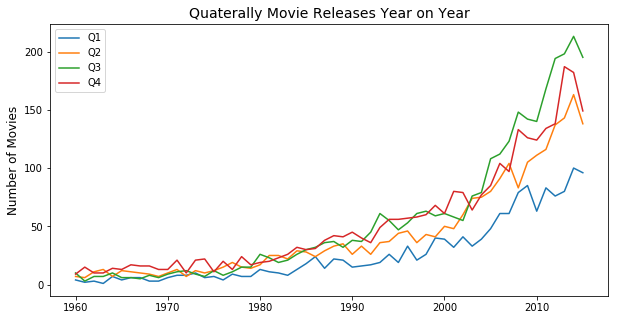

In [37]:
# plotting

plt.subplots(figsize=(10,5))

plt.plot(Q1_mov.year,Q1_mov.number_of_movies,label='Q1')
plt.plot(Q2_mov.year,Q2_mov.number_of_movies,label='Q2')
plt.plot(Q3_mov.year,Q3_mov.number_of_movies,label='Q3')
plt.plot(Q4_mov.year,Q4_mov.number_of_movies,label='Q4')
plt.legend(loc="upper left")
plt.ylabel('Number of Movies', fontsize=12)
plt.title('Quaterally Movie Releases Year on Year',fontsize=14);

#### Result: Q3 and Q4 are the strongest quaters for movie releases. Q1 has the least number of movies releases consistently.

In [171]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0